# Team 44 Group Assignment: Stroke Prediction

A stroke can be defined as an interruption of blood flow to part of the brain, resulting in the death of brain cells due to lack of oxygen and nutrients. This will result in permanent loss of brain function within minutes if blood flow is not reestablished immediately such as a loss of motor functions and rational thought. According to the Centres for Disease Control and Prevention (CDC), 1 in 6 deaths from cardiovascular diseases was from strokes in the year 2020 in the United States.

There are two main types of stroke: ischemic stroke and hemorrhagic stroke.

Ischemic stroke: This is the most common type of stroke, accounting for about 80% of all cases. It occurs when a blood clot or atherosclerotic plaque blocks or narrows a blood vessel in the brain, reducing blood flow. Ischemic strokes can also be caused by other factors such as embolism (a blood clot that forms elsewhere in the body and travels to the brain) or systemic hypoperfusion (generalized inadequate blood flow).

Hemorrhagic stroke: This type of stroke happens when a blood vessel in the brain ruptures, leading to bleeding into the brain or the spaces surrounding it. Hemorrhagic strokes are less common but generally more severe than ischemic strokes. They can be further classified into intracerebral hemorrhage (bleeding within the brain tissue) and subarachnoid hemorrhage (bleeding into the space between the brain and the thin tissues that cover it).

Hence, it is imperative that steps be taken to identify individuals who are at risk of getting a stroke to prevent permanent physiological damage to individuals of society.

In this machine learning project, we, Team 44 of the WIA1006 Machine Learning course of University of Malaya would like to develop a machine learning model that predicts which individual(s) are at risk of getting a stroke. We will analyze a dataset of interest that will be used to train different machine learning models of which we will evaluate their respective accuracies and efficiencies.

## Data Analysis

In [1]:
# Importing popular data science libraries
import pandas as pd # for data manipulation and analysis
import numpy as np #  for working with arrays - has functions working with linear algebra, fourier transform and matrices
import matplotlib.pyplot as plt # creating static, animated and interactive visualizations in Python
import seaborn as sns # provides high-level interface for drawing attractive and informative statistical graphics


### Loading dataset

This section involves previewing, studying the features and checking the dataset for missing values

In [2]:
url = 'https://raw.githubusercontent.com/Chandrakant817/Stroke-Prediction/main/Stroke_Prediction/healthcare-dataset-stroke-data.csv'
data = pd.read_csv(url)

In [3]:
data # prints the first and last few rows of training example

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


There is a column 'id' which is irrelevant because the unique identifiers are not meaningful. That column will be discarded from the dataframe.

In [4]:
data.drop(columns="id", inplace=True)
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


From the data.info() command, we can see that the feature 'bmi' has missing values relative to all the other features. The missing values will need to be handled in the data preprocessing section later.

In [ ]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Based on the output above, there are some observations that can be made:
1. BMI contains missing values. (BMI count is 4909 when data frame consists of 5110 rows)
2. The mean age is 43.
3. The mean glucose level is 106.
4. The mean bmi is 28.

<Axes: >

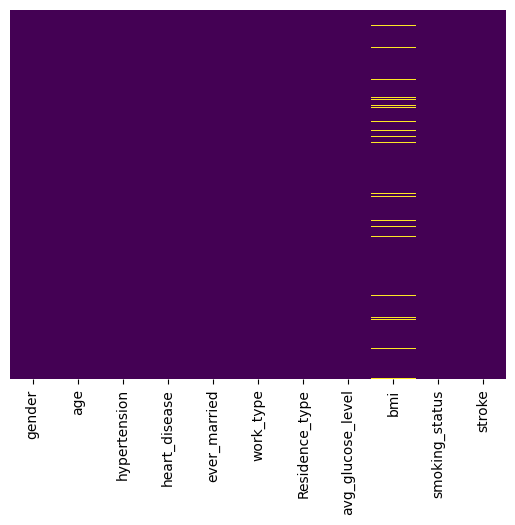

In [ ]:
# Use seaborn to create a simple heatmap to see where we are missing data
sns.heatmap(data.isnull() , yticklabels=False , cbar=False , cmap='viridis')

In [ ]:
print(data.ever_married.value_counts())
print(data.work_type.value_counts())
print(data.Residence_type.value_counts())
print(data.smoking_status.value_counts())

Yes    3353
No     1757
Name: ever_married, dtype: int64
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


We can see that there are some non-numeric features or categorical variables available in the dataset. These will be processed to become numeric, binary features later on in the data preprocessing section

### Data visualization

Creating graphical representations of the numeric features to perceive the dataset from a different angle

Visualising data through graphical representation can provide a comprehensive understanding of the interplay between individual features and the target variable. This approach facilitates a more effective assessment of the relationship between the variables in question, allowing for a deeper and more nuanced analysis.


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hypertension'}>],
       [<Axes: title={'center': 'heart_disease'}>,
        <Axes: title={'center': 'avg_glucose_level'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'stroke'}>]], dtype=object)

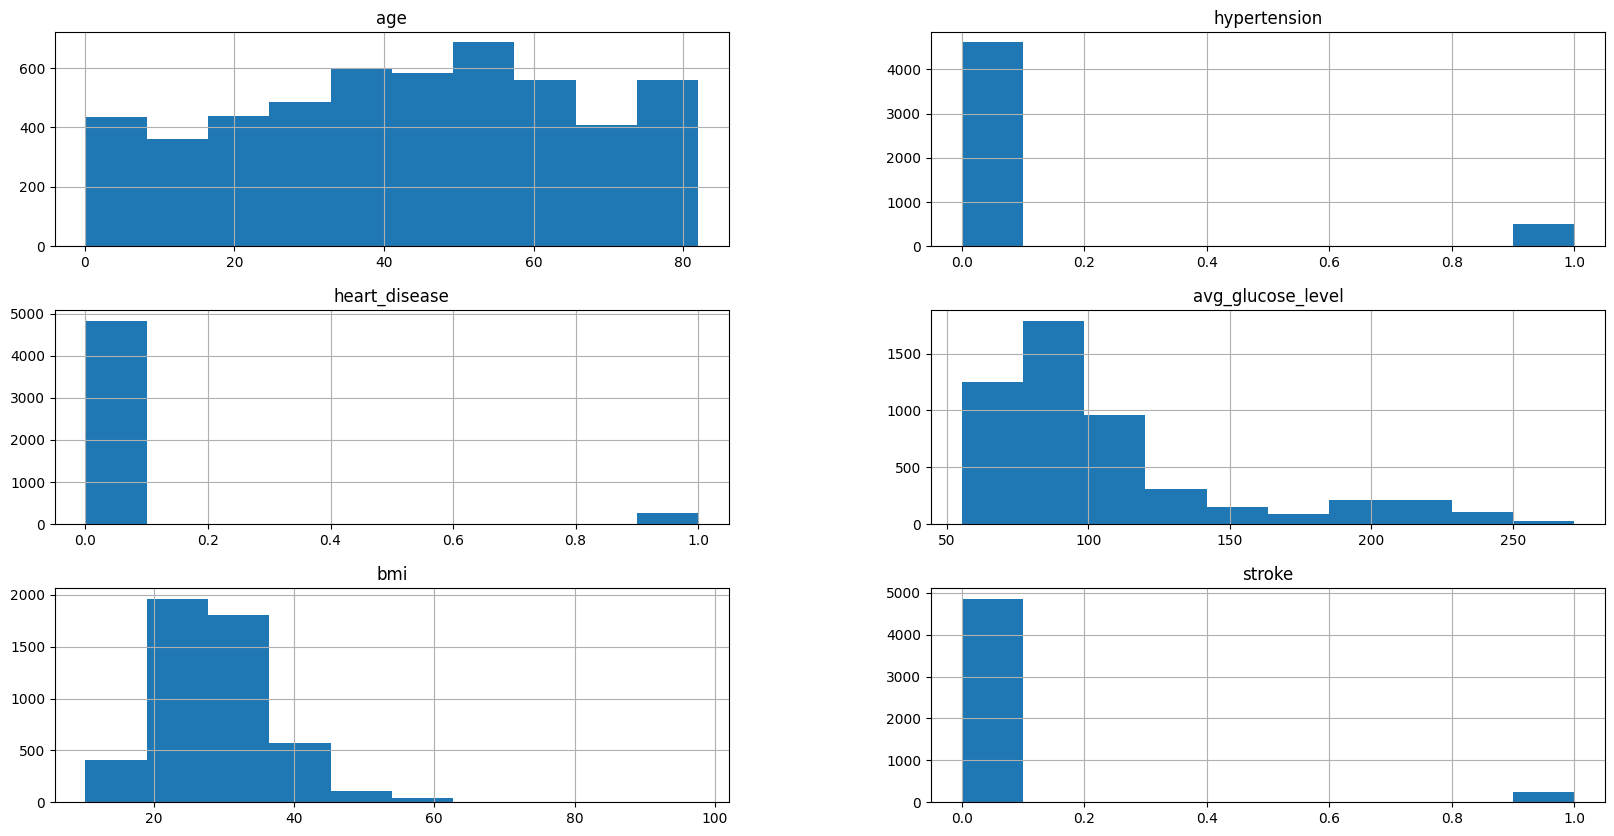

In [ ]:
data.hist(figsize=(20,10))

UNIVARIATE ANALYSIS

Univariate analysis explores each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It describes the pattern of response to the variable. It describes each variable on its own.

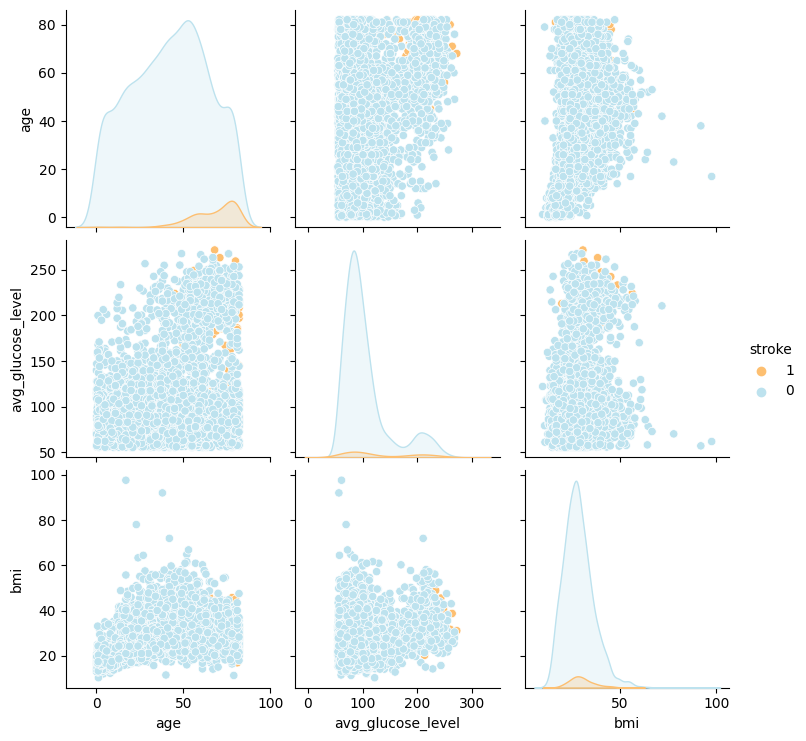

In [ ]:
#we will observe the scatterplots of numerical variables, as well as the respective distribution of each one, highlighting the stroke values ​​for each visualization
sns.pairplot(data.drop(['hypertension', 
                      'heart_disease'], axis=1), 
             hue='stroke',
             palette='RdYlBu',
             hue_order=[1,0]);

MULTIVARIATE ANALYSIS

Multivariate analysis involves evaluating multiple variables (more than two) to identify any possible association among them. It offers a more complete examination of data by looking at all possible independent variables and their relationships to one another

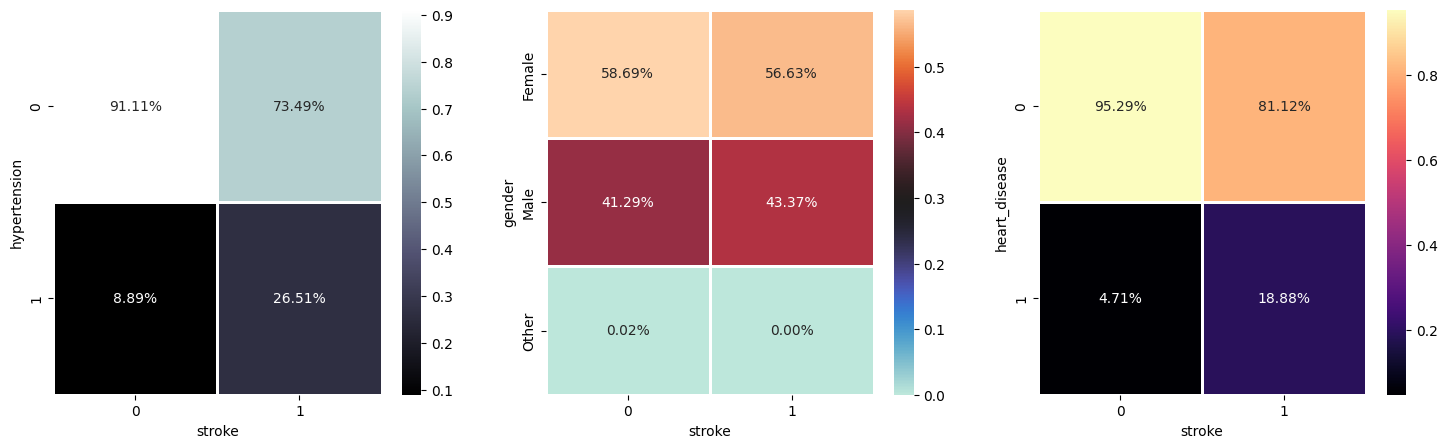

In [ ]:
#check the possibilities of getting stroke based on these variables: hypertension, gender, heart_disease 
#using heatmap to find the correleation between the above variables and stroke
fig, ax = plt.subplots(1, 3, figsize=(18,5))

var = ['hypertension', 'gender', 'heart_disease'] #variables to compare
cmaps = ['bone', 'icefire', 'magma'] #attributes of map

for var, i in zip(var, range(3)):
    ctab = pd.crosstab(data[var], 
                   data['stroke'], 
                   normalize='columns')

    sns.heatmap(ctab, 
                annot=True, 
                fmt='.2%', 
                ax=ax[i],
                cmap=cmaps[i], 
                linewidths=1);

We can conclude that individuals without hypertension are the majority of people who have had a stroke. Women account for the largest number of stroke cases. People who do not have heart problems are the majority of those who have a stroke.

In [ ]:
# Determining percentage of people who have stroke for each categorical data
def plot_percent_of_stroke(data , column , axis):
    x_axis = []
    y_axis = []

    unique_values = data[column].unique()

    for value in unique_values:
        stroke_yes = len(data[(data[column] == value) & (data['stroke'] == 1)])
        total = len(data[data[column] == value])
        percentage = (stroke_yes/total)*100
        x_axis.append(value)
        y_axis.append(percentage)

    palette = sns.color_palette("Reds", 5)
    sns.barplot(x=x_axis, y=y_axis, ax=axis, palette=palette) # create bar plot of the percentages for each catergory

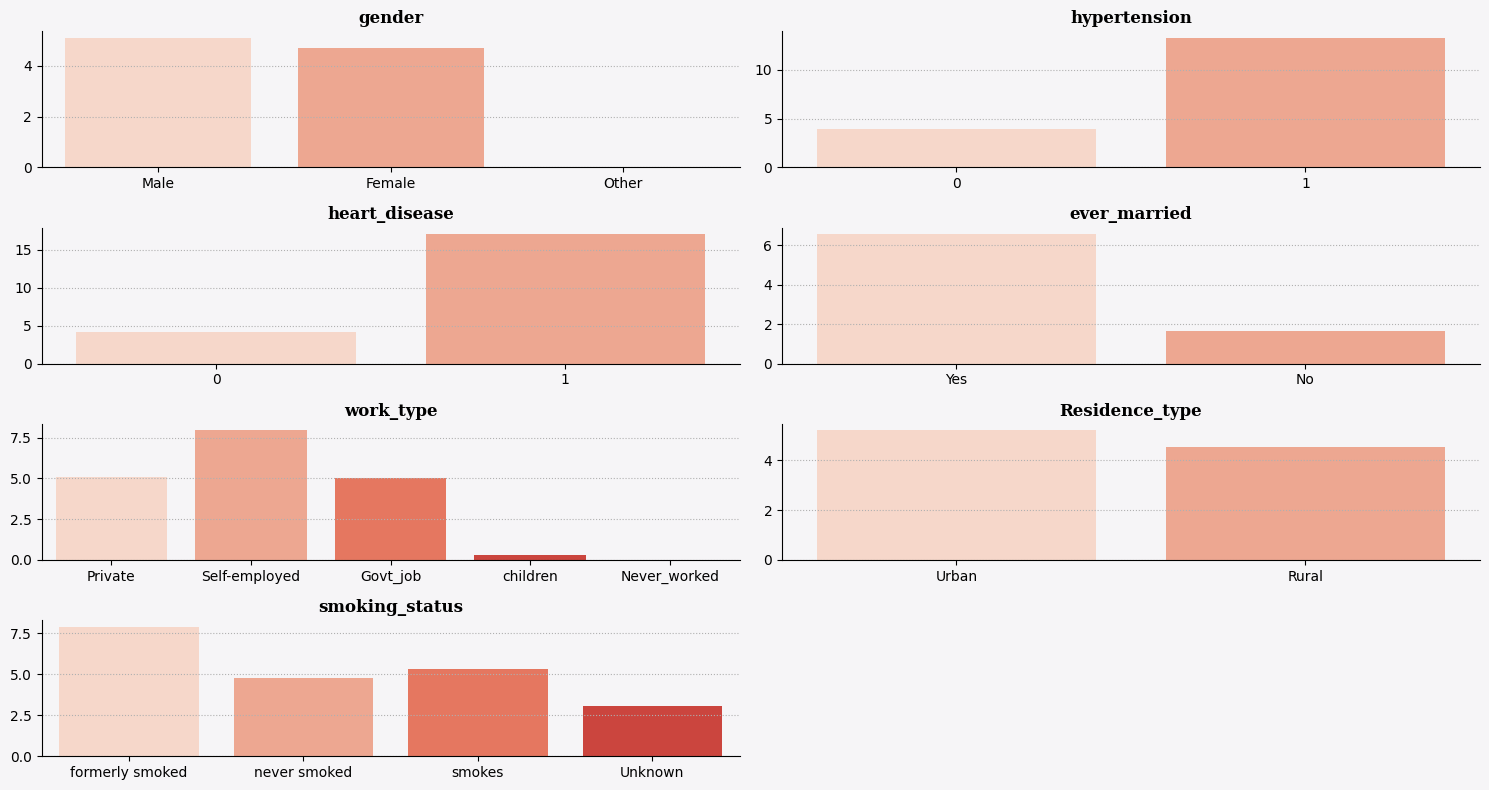

In [ ]:
data_categorical = data[['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']]
fig = plt.figure(figsize=(15,8))
background_color = '#f6f5f7'
fig.patch.set_facecolor(background_color) 
for indx, val in enumerate(data_categorical.columns):
    ax = plt.subplot(4, 2, indx+1)
    ax.set_facecolor(background_color)
    ax.set_title(val, fontweight='bold', fontfamily='serif')
    for i in ['top', 'right']:
        ax.spines[i].set_visible(False)
    ax.grid(linestyle=':', axis='y')
    plot_percent_of_stroke(data, val, ax) # call function to plot percentage

plt.tight_layout()
plt.show()

Observations:
1. The percentage of male and female who has stroke are almost equal.

## Data Preprocessing

### Handling missing values

There are various techniques to handle missing data:
1. Delete the record with missing values
    - this step is okay if you have a very huge dataset 
    - it is not suitable for small dataset
    - if the dataset is small, deleting records with missing values will cause disadvantageous impact to the performance of the model
2. Create a separate model to handle missing values
    - takes more time and computational efforts
    - consider the records with missing values as test dataset and the records without missing values as training dataset
    - eg. f1 has missing values, use f2, f3, f4 to feed to that separate training model and let f1 be the output feature
    - then use the f2, f3, f4 of the record with missing value to feed as input to the model, it will give output for f1(the missing value)
    - suitable for when you have smaller dataset, with lesser missing values
3. Using statistical methods like mean, median or mode
    - mean --> use the simple mean to replace the missing values
    - median --> sort in ascending order then use the central element to replace the missing values
    - mode --> use the value with most frequency to replace the missing values

For this model, we have chosen to use the statistical method using mean for the missing values of bmi.

In [ ]:
def draw_missing_data_table(data) :
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total , percent] , axis=1 , keys=['Total','Percent'])
    return missing_data
draw_missing_data_table(data)

,Total,Percent
bmi,201,0.039335
gender,0,0.000000
age,0,0.000000
hypertension,0,0.000000
heart_disease,0,0.000000
ever_married,0,0.000000
work_type,0,0.000000
Residence_type,0,0.000000
avg_glucose_level,0,0.000000
smoking_status,0,0.000000


In [5]:
# Imputing the missing values with the mean
data = data.fillna(np.mean(data['bmi']))

In [ ]:
data.info() # display the status of updated dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


We have successfully filled in the missing values of bmi

### Handling non-numerical values

In [6]:
#using one hot encoding to convert all categorical data 
#integer encoded variable is removed and a new binary variable is added
categorical = ['gender', 'ever_married', 'work_type', 
               'Residence_type', 'smoking_status']

for i in categorical:
    data = pd.concat([data, pd.get_dummies(data[i], prefix=i)], axis=1)
    data.drop(i, axis=1, inplace=True)

In [7]:
data

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,202.21,28.893237,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.000000,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.893237,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
5106,81.0,0,0,125.20,40.000000,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
5107,35.0,0,0,82.99,30.600000,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.600000,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0


### Analysis with stroke

In [ ]:
pd.DataFrame(data['stroke'].value_counts())

,stroke
0,4861
1,249


We observe that the dataset in question is unbalanced, since we have 4,861 instances without stroke but 249 examples with stroke, so we can conclude that it will make much easier for a Machine Learning model to predict instances 0 than 1.

### Feature Selection

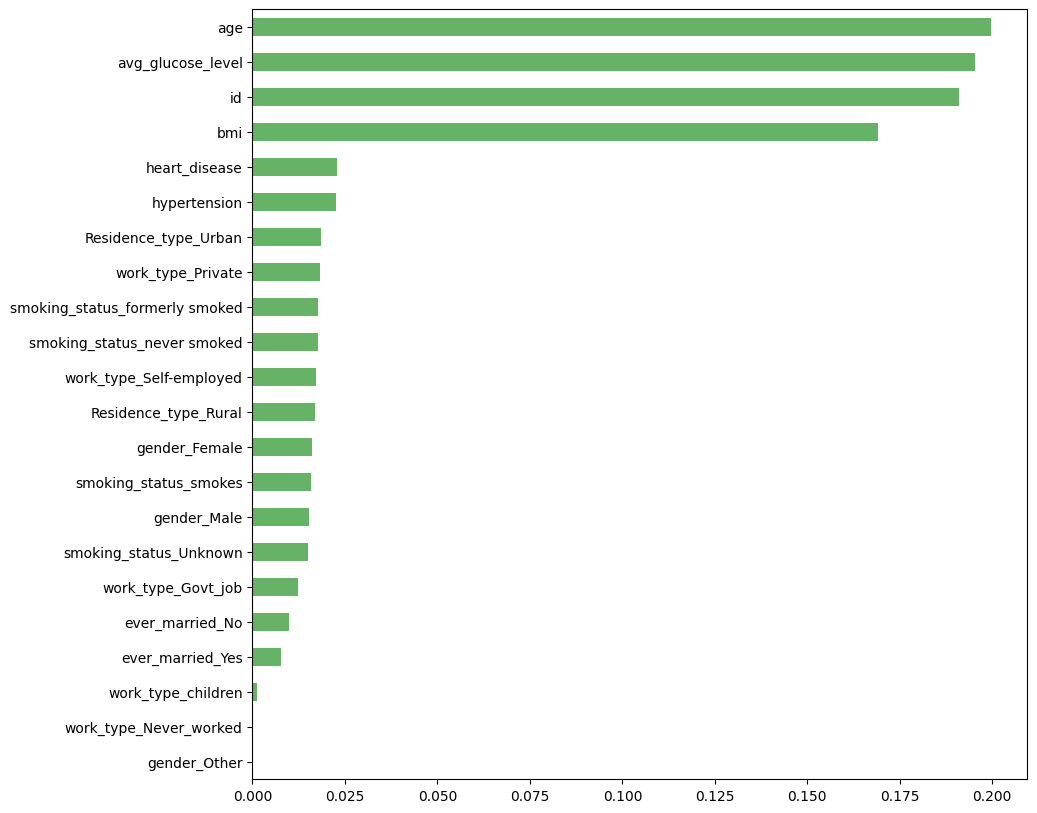

In [ ]:
#using random forest classifier to identify features 
from sklearn.ensemble import RandomForestClassifier

rffs = RandomForestClassifier()

rffs.fit(data.drop('stroke', axis=1), 
         data['stroke'])

rf_importances = rffs.feature_importances_
rf_importances = pd.Series(rf_importances, 
                           index=data.drop('stroke', axis=1) \
                                   .columns.values)

plt.figure(figsize=(10,10))
rf_importances.sort_values()\
              .plot(kind='barh', 
                    color='g', 
                    alpha=.6);

We can conclude that the variables avg_gulcose_level, age, and bmi affect the prediction of getting stroke the highest.

In [8]:
#dividing datasets to features and target
# Features
X = data.drop(['stroke'], axis=1).values

# Target
y = data['stroke'].values

In [9]:
#check for null values
data.isnull().sum()

age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
stroke                            0
gender_Female                     0
gender_Male                       0
gender_Other                      0
ever_married_No                   0
ever_married_Yes                  0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Rural              0
Residence_type_Urban              0
smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

### Splitting datasets into train and test sets

In [10]:
from sklearn.model_selection import train_test_split

In [ ]:
#did not use this split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                   np.reshape(y,(-1,1)), 
                                   test_size=0.25,
                                   random_state=42,
                                   shuffle=True)

print(f'Length of original dataframe size: {len(X)}')
print(f'Length of training dataframe size (75%): {len(X_train)}')
print(f'Length of testing dataframe size (25%): {len(X_test)}')

In [ ]:
#shape of training and testing data
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

### Handling Imbalance in the Dataset

Most of the time the minority class is our focus class (in this case it is the instances with stroke)

3 ways ot handle imbalance: 
1. Undersampling
    - sample size is smaller than the size of the actual dataset
    - not very popular bcs we're losing a lot of data (data is precious)

2. Oversampling
    - sample size more than size of actual dataset
    - i.e. keep 4861 as it is, and oversample the 249 to higher number
    - random duplication

3. SMOTE
    - take average of nearest neighbour of existing stroke=1 datapoints and extrapolate to create synthetic records
    - keep on taking until number of records become equal to majority class
    - the new samples are not duplicate, but synthetically created 


Synthetic Minority Oversampling Technique (SMOTE)
- we will do it after data splitting
- apply SMOTE algorithm only on training subset to avoid data leakage (information from outside training dataset being used in model training process) or artificially inflating performance metrics, resulting in over optimistic performance estimates
- by applying SMOTE only on the training data, we can ensure that the synthetic samples generated by SMOTE are independent of the test set, hence maintaining the integrity of the evaluation process

In [11]:
from imblearn.over_sampling import RandomOverSampler

In [12]:
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=1/3, random_state=42, stratify=y_resampled)


In [ ]:
# did not use this

from imblearn.over_sampling import SMOTE
smote = SMOTE()

X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train) # SMOTE on training dataset


In [ ]:
# Calculate class distribution before SMOTE
unique_classes, class_counts = np.unique(y_train, return_counts=True)
class_distribution_before_smote = dict(zip(unique_classes, class_counts))
print("Before SMOTE:", class_distribution_before_smote)

# Calculate class distribution after SMOTE
unique_classes_smote, class_counts_smote = np.unique(y_train_smote, return_counts=True)
class_distribution_after_smote = dict(zip(unique_classes_smote, class_counts_smote))
print("After SMOTE:", class_distribution_after_smote)

# until this did not use 
#

### Standardizing data values

In [13]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)
print(X_train_std.shape)
print(X_test.shape)

(6481, 21)
(3241, 21)


X_train_std = std.fit_transform(X_train)
- Fit the StandardScaler object to the training set (X_train) and then transform it to a standardized representation. This involves calculating the mean and standard deviation of each feature in the training set and using those values to scale and center the data.
X_test_std = std.transform(X_test)
- Transform the test set (X_test) using the same scaling factor (mean and standard deviation) obtained from the training set. Note that we only call the transform() method here since we already fit the scaler to the training set earlier.

### Normalising data values

In [14]:
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler()
#X_train_norm = norm.fit_transform(X_train_smote)
X_train_norm = norm.fit_transform(X_train)
X_test_norm = norm.transform(X_test)
print(X_train_norm.shape)
print(X_test.shape)

(6481, 21)
(3241, 21)


X_test_norm = norm.transform(X_test)
- The fit_transform method is used for fitting the scaler on the training data and transforming it. However, when transforming the test data, we only want to apply the transformation learned on the training data without re-fitting the scaler. Therefore, we use the transform method for the test data, which applies the same transformation as used on the training data.

## Machine Learning Model Training

Before we start our dataset training, we want to identify which training model will give us the most accuracy in the f1 score. For this datasert we will be using Logistic Regression, Decision Tree, KNN (K-Nearest Neighbours), SVM (Support Vector Machines) and Random Forest. 

In [15]:
#importing necessary algorithm libaries 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import tree 
from sklearn.preprocessing import StandardScaler

0    4861
1     249
dtype: int64

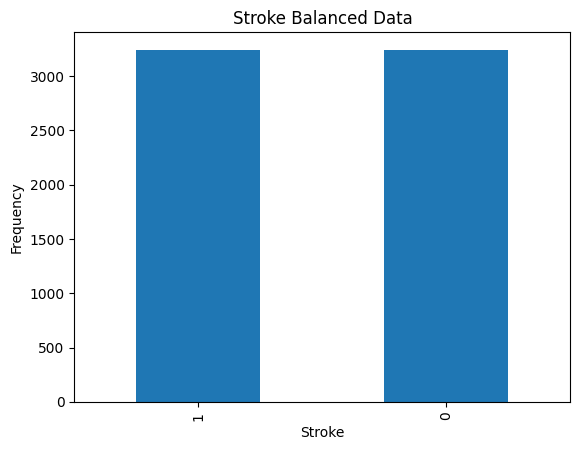

In [16]:
#before we implement the training models, we want to check if our dataset is balanced
pd.value_counts(y_train).plot.bar()
plt.title('Stroke Balanced Data')
plt.xlabel('Stroke')
plt.ylabel('Frequency')
pd.value_counts(y)

We can see that data is clearly balanced now 

We can now continue to check which machine learning algorithm works best with our balanced dataset

All models will use the random_state of 42 (following the same number as we used in splitting our dataset) and the max_depth of 5

In [17]:
# import lib
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble, metrics

In [18]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix,classification_report, ConfusionMatrixDisplay, roc_auc_score
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

In [19]:
print('Random Forest')

rf = RandomForestClassifier(criterion='gini', max_depth=5, random_state=42)
rf.fit(X_train_std, y_train)
y_pred = rf.predict(X_test_std)

print('Confusion Matrix:')
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Acc=accuracy_score(y_test, y_pred) * 100
print("Accuracy :", accuracy_score(y_test, y_pred) * 100)
print("Training-Score",rf.score(X_train_std,y_train))
print("Testing -Score",rf.score(X_test_std,y_test))

Random Forest
Confusion Matrix:
[[1135  486]
 [ 184 1436]]
              precision    recall  f1-score   support

           0       0.86      0.70      0.77      1621
           1       0.75      0.89      0.81      1620

    accuracy                           0.79      3241
   macro avg       0.80      0.79      0.79      3241
weighted avg       0.80      0.79      0.79      3241

Accuracy : 79.32736809626658
Training-Score 0.7909273260299337
Testing -Score 0.7932736809626658


In [20]:
roc = roc_auc_score(y_test,y_pred)
print('ROC AUC Score: {:.2f} %'.format(roc))

# k-fold validation; k = 10 folds
accuracies = cross_val_score(estimator= rf, X = X_train_std,y = y_train, cv=10)
print('K-Fold Validation Mean Accuracy: {:.2f} %'.format(accuracies.mean()*100))

ROC AUC Score: 0.79 %
K-Fold Validation Mean Accuracy: 79.37 %


Text(0.5, 23.52222222222222, 'Predicted label')

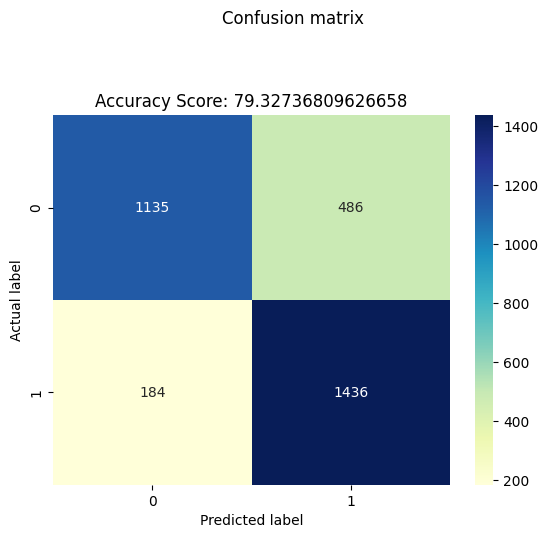

In [21]:
y_pred = rf.predict(X_test_std)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

y_pred = rf.predict(X_test_std)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.suptitle('Confusion matrix', y=1.1)
plt.title('Accuracy Score: {0}'.format(Acc))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [22]:
# random forest does not directly provide a loss curve since it does not optimize a loss function
# an accuracy/ learning curve is plotted instead using the use the out-of-bag (OOB) error estimate
n_estimators_range = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
oob_errors = []

for n_estimators in n_estimators_range:
    clf = RandomForestClassifier(n_estimators=n_estimators, oob_score=True, random_state=42)
    clf.fit(X_train_std, y_train)
    oob_error = 1 - clf.oob_score_
    oob_errors.append(oob_error)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


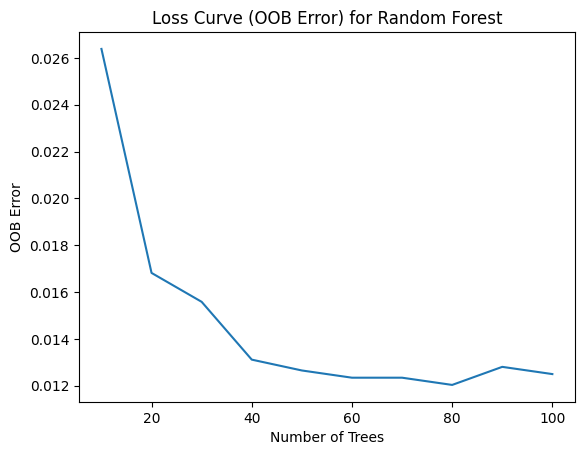

In [23]:
# plotting the loss curve
plt.plot(n_estimators_range, oob_errors)
plt.xlabel('Number of Trees')
plt.ylabel('OOB Error')
plt.title('Loss Curve (OOB Error) for Random Forest')
plt.show()

The OOB curve does not have a 'best fit' curve. The OOB error curve typically shows the relationship between the number of trees in the random forest and the corresponding OOB error. As the number of trees increases, the OOB error tends to decrease, indicating improved accuracy. 

Implement KNN model

In [24]:
#KNN
print('KNN')
test_scores = []
train_scores = []

for i in range(1, 11):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train_std, y_train)
    
    train_scores.append(knn.score(X_train_std, y_train))
    y_pred = knn.predict(X_test_std)
    test_scores.append(accuracy_score(y_test, y_pred))

average_accuracy = np.mean(test_scores)
print("Average Accuracy: {:.2f}%".format(average_accuracy * 100))
    
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100, list(map(lambda x: x+1, train_scores_ind))))

max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100, list(map(lambda x: x+1, test_scores_ind))))

KNN
Average Accuracy: 91.99%
Max train score 100.0 % and k = [1, 2]
Max test score 96.57513113236655 % and k = [1, 2]


Model results analysis
- Create visual graph to evaluate train and test scores using "matplotlib"
- Analyse whether trained data is overfitting or underfitting the dataset based on the train score and test score lines
- The results shows no overfitting or underfitting and suggest that the model fits the testing data

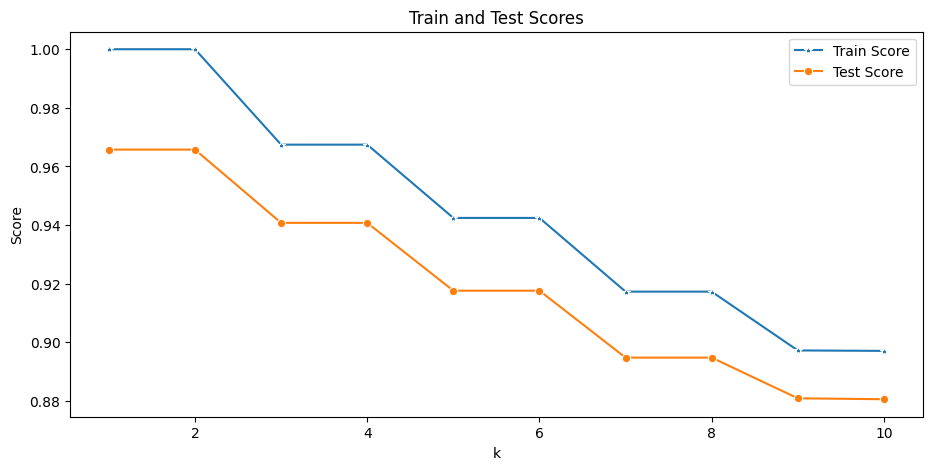

In [25]:
plt.figure(figsize=(11, 5))
sns.lineplot(x=range(1, 11), y=train_scores, marker='*', label='Train Score')
sns.lineplot(x=range(1, 11), y=test_scores, marker='o', label='Test Score')
plt.xlabel('k')
plt.ylabel('Score')
plt.title('Train and Test Scores')
plt.legend()
plt.show()


Obtain the accuracy of the trained model with the latest K value

In [26]:
knn = KNeighborsClassifier(11)

knn.fit(X_train_std,y_train)
knn.score(X_test_std,y_test)

0.8660907127429806

Confusion Matrix graph classification results representation

Text(0.5, 23.52222222222222, 'Predicted label')

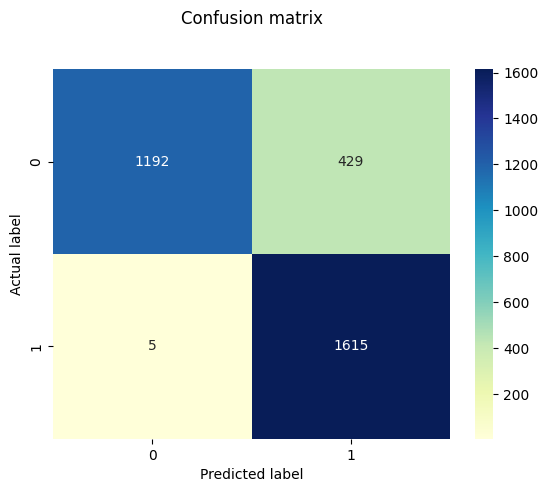

In [27]:
y_pred = knn.predict(X_test_std)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

y_pred = knn.predict(X_test_std)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.74      0.85      1621
           1       0.79      1.00      0.88      1620

    accuracy                           0.87      3241
   macro avg       0.89      0.87      0.86      3241
weighted avg       0.89      0.87      0.86      3241



Neural Network

In [29]:
# Importing model development tools
from tensorflow import keras
from keras import layers, callbacks

# Setup plotting tools
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

# Defining reusable codes
def plot_learning_curve(history):
    history = pd.DataFrame(history.history)
    history.loc[0:, ['loss', 'val_loss']].plot()
    history.loc[0:, ['accuracy', 'val_accuracy']].plot(ylim=(0,1))
    print("Minimum validation loss: {:0.4f}".format(history['val_loss'].min()))

<ipython-input-29-87a843fa7aaf>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


Rescaling the feature values and partitionining training data partly for validation set.

- Two datasets are prepared from this: (1) a normalized dataset and (2) a standardized dataset

In [ ]:
# Normalized dataset
# did not use this part 
normalizer = MinMaxScaler()
X_tr = normalizer.fit_transform(X_train_std)
X_te = normalizer.transform(X_test_std)
X_train_nn, X_valid_nn, y_train_nn, y_valid_nn = train_test_split(X_tr, y_train, test_size=0.25, random_state=42, shuffle=True)

In [31]:
# Standardized dataset
standardizer = StandardScaler()
X_tr = standardizer.fit_transform(X_train)
X_te = standardizer.transform(X_test)
X_train_nn, X_valid_nn, y_train_nn, y_valid_nn = train_test_split(X_tr, y_train, test_size=0.25, random_state=42, shuffle=True)

developing the model

Epoch 1/200
76/76 [==============================] - 4s 17ms/step - loss: 0.6812 - accuracy: 0.5733 - val_loss: 0.6560 - val_accuracy: 0.6132
Epoch 2/200
76/76 [==============================] - 1s 10ms/step - loss: 0.6287 - accuracy: 0.6537 - val_loss: 0.5626 - val_accuracy: 0.7446
Epoch 3/200
76/76 [==============================] - 1s 11ms/step - loss: 0.5892 - accuracy: 0.7136 - val_loss: 0.5312 - val_accuracy: 0.7557
Epoch 4/200
76/76 [==============================] - 1s 11ms/step - loss: 0.5727 - accuracy: 0.7206 - val_loss: 0.5112 - val_accuracy: 0.7816
Epoch 5/200
76/76 [==============================] - 1s 10ms/step - loss: 0.5551 - accuracy: 0.7372 - val_loss: 0.4982 - val_accuracy: 0.7927
Epoch 6/200
76/76 [==============================] - 1s 10ms/step - loss: 0.5424 - accuracy: 0.7434 - val_loss: 0.5005 - val_accuracy: 0.7829
Epoch 7/200
76/76 [==============================] - 1s 10ms/step - loss: 0.5307 - accuracy: 0.7453 - val_loss: 0.4771 - val_accuracy: 0.7829
Epoch 

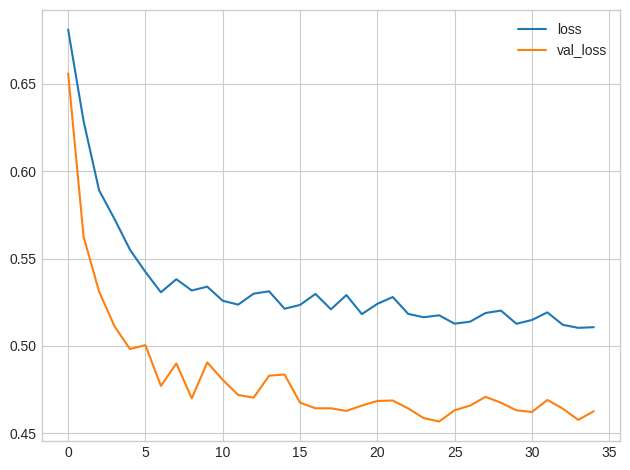

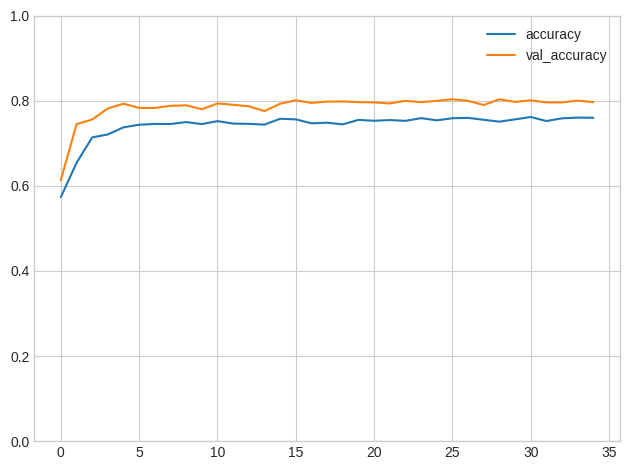

In [32]:
feature_dim = X_train_nn.shape[1]

early_stop = callbacks.EarlyStopping(
                min_delta=0.001, # amount of change in loss to execute early stopping
                patience=10, # number of epochs to wait for before early stopping
                restore_best_weights=True, # change the best weights before overfitting occurs
)

neural_network = keras.Sequential([
                    layers.Dense(2, activation='sigmoid', input_shape=[feature_dim]),
                    layers.Dense(1024, activation='relu'),
                    layers.Dense(256, activation='relu'),
                    layers.Dense(128, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(4, activation='relu'),
                    layers.Dropout(rate=0.3),
                    layers.Dense(1, activation='sigmoid'),
])

neural_network.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history_nn = neural_network.fit(
                    x=X_train_nn, y=y_train_nn,
                    validation_data=(X_valid_nn, y_valid_nn),
                    batch_size=64,
                    epochs=200,
                    verbose=1,
                    callbacks=[early_stop],

)

plot_learning_curve(history_nn)

102/102 [==============================] - 0s 3ms/step


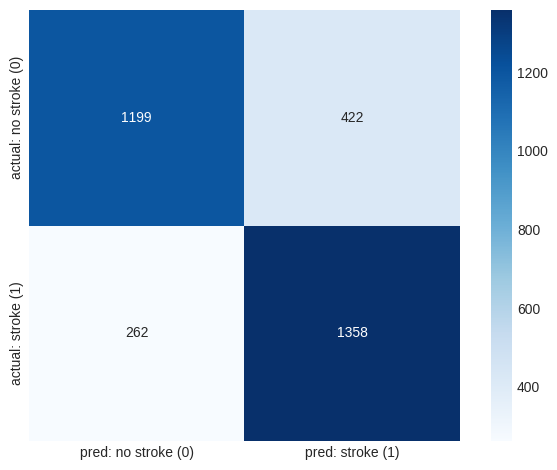

              precision    recall  f1-score   support

           0       0.82      0.74      0.78      1621
           1       0.76      0.84      0.80      1620

    accuracy                           0.79      3241
   macro avg       0.79      0.79      0.79      3241
weighted avg       0.79      0.79      0.79      3241

Train Accuracy: 	0.785
Validation Accuracy: 	0.800
Test Accuracy: 		0.789


In [33]:
# Plotting confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = np.round(neural_network.predict(X_te))

xlabels = ['pred: no stroke (0)', 'pred: stroke (1)']
ylabels = ['actual: no stroke (0)', 'actual: stroke (1)']
material = confusion_matrix(y_test, y_pred) 
sns.heatmap(material, square=True, annot=True, fmt='d', cbar=True, cmap='Blues', xticklabels=xlabels, yticklabels=ylabels)
plt.show()

# Displaying classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

# Display train, validation and test accuracies
loss, train_acc = neural_network.evaluate(X_train_nn, y_train_nn, verbose=0)
print('Train Accuracy: \t%.3f' % train_acc)

loss, valid_acc = neural_network.evaluate(X_valid_nn, y_valid_nn, verbose=0)
print('Validation Accuracy: \t%.3f' % valid_acc)

loss, test_acc = neural_network.evaluate(X_te, y_test, verbose=0)
print('Test Accuracy: \t\t%.3f' % test_acc)

Now that we have tested our data in multiple training model, we are going to compare the accuracy score for each and find out which model got the best resutls. 

In [ ]:
mscore=[] # declare an array mscore, to store all the accuracy scores in all models
mscore.append(['Logistic Regression', lr.score(X_test, y_test)])
mscore.append(['Random Forest', rf.score(X_test, y_test)])
mscore.append(['Decision Tree', dt.score(X_test, y_test)])
mscore.append(['KNN', knn.score(X_test, y_test)])
mscore.append(['ANN', neural_network.evaluate(X_test, y_test)])


In [ ]:
#arrange the values in descending order and print array
mscore.sort(key=lambda x: x[1], reverse=True)
mscore

In [ ]:
#display the values in a horizontol bar chart 
model = list(i[0] for i in mscore)
score = list(round(i[1]*100,2) for i in mscore)

print('Accracy Score: \n')
for m,s in zip(model, score):
    print(f'{m}: {s}%')

#creating horizontal bar chart
plt.barh(model, score, height = 0.5, color='yellow') 

plt.xlabel("Accuracy Score")
plt.ylabel("Model")
plt.title("Model Comparison")
plt.gca().invert_yaxis()
plt.show()